# INTRODUCTION

This project focuses on building a robust text classification model tailored to the domain of article categorization. With a dataset comprising 141 articles spanning five diverse categories including sports, economy, culture, politics, and society, our aim is to develop an intelligent system capable of accurately assigning articles to their respective categories.

Utilizing Python along with powerful libraries such as scikit-learn and NLTK (Natural Language Toolkit), we embark on a journey to preprocess the raw text data, train multiple machine learning models, and evaluate their performance to identify the most effective approach for article classification.

Through this endeavor, we not only seek to demonstrate the practical application of machine learning in text analysis but also pave the way for enhancing information retrieval and content organization in the digital era.


# Importing Libraries

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC ,SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import *
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk
import re

# DATA LOADING

Loading article data from text files into a dataframe

In [20]:
import re
files = ["28 articles société.txt","29 articles sport.txt","20 articles ecomonie.txt", "28 articles politique.txt", "36 articles culture.txt"]
data=[]
for i in files:
    with open(i, encoding="utf8") as f:
        file= f.read()
    pattern = r'-+[0-9]+-+'
    result= re.split(pattern,file)
    data.extend(result)
print(len(data))

141


In [24]:
# Creating labels file to categorize each article

labels=open("labels.txt","w",encoding="utf8")
for i in range(1,len(data)+1):
    if i<=28:
        labels.write("société \n")
    if 28<i<=57:
        labels.write("sport\n")
    if 57<i<=77:
        labels.write("ecomonie\n")
    if 77<i<=105:
        labels.write("politique\n")
    if 105<i<=141:
        labels.write("culture\n")

In [29]:
import pandas as pd
# Loading labels from the file
labels = pd.read_csv("labels.txt", header=None)

# Counting label values
label_counts = labels.value_counts()

# Debugging: Print out the number of labels
print(len(labels))


141


In [30]:
# Counting label values
import pandas
df = pandas.DataFrame(labels)
df.value_counts()

culture      36
sport        29
politique    28
société      28
ecomonie     20
dtype: int64

## Visual Data Exploration

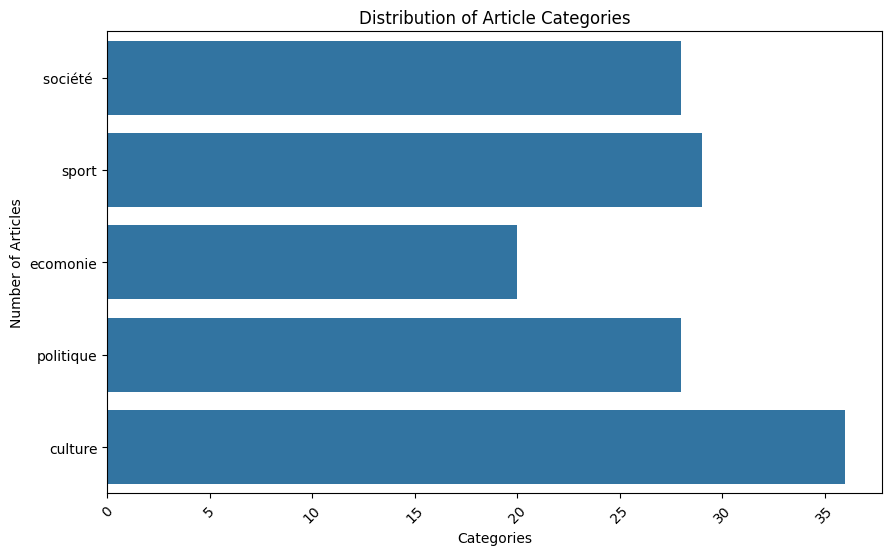

In [31]:
# Visualizing label counts
plt.figure(figsize=(10, 6))
sns.countplot(labels[0])
plt.title('Distribution of Article Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-60-a89e9e9c7a3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels[0], palette='Set2')


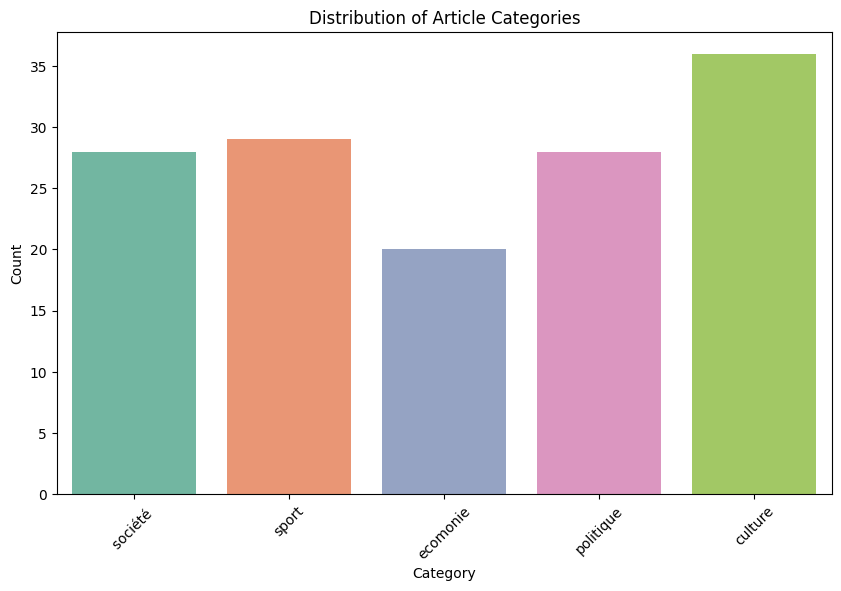

In [60]:
# Count plot of label values with detailed visualization

plt.figure(figsize=(10, 6))
sns.countplot(x=labels[0], palette='Set2')
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

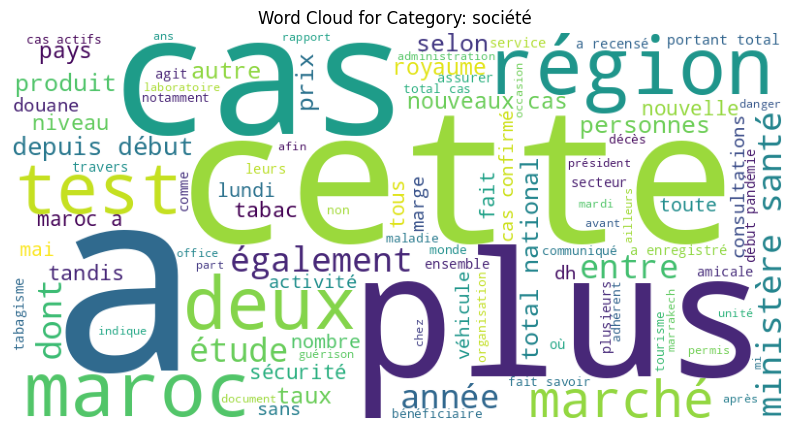

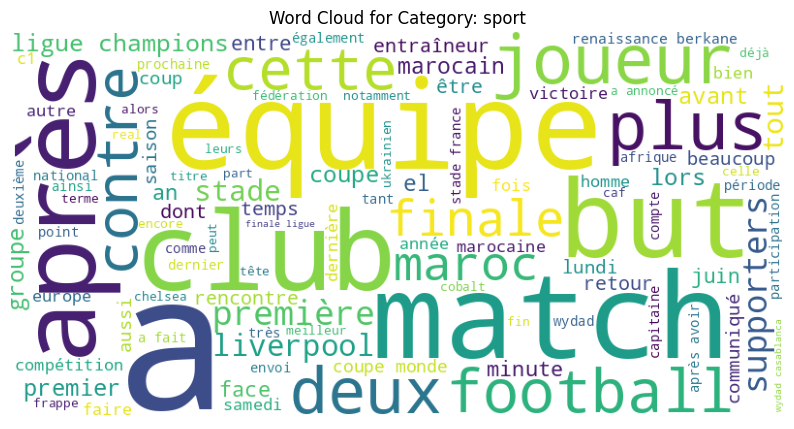

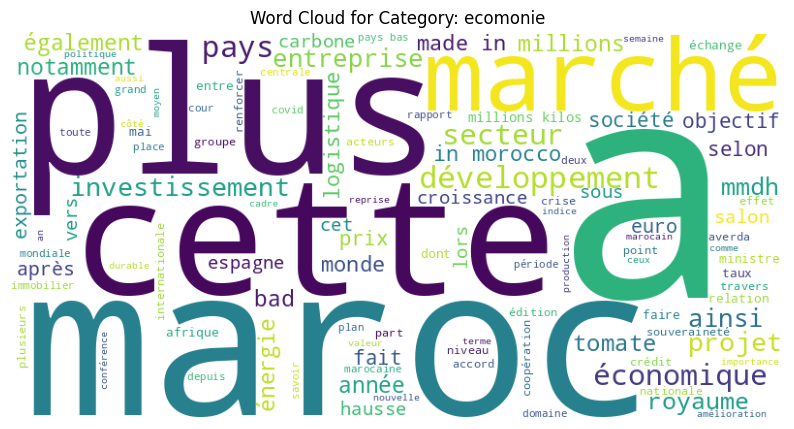

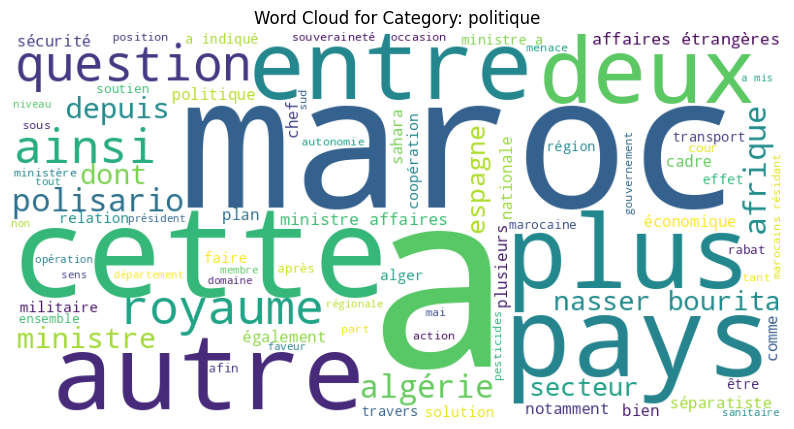

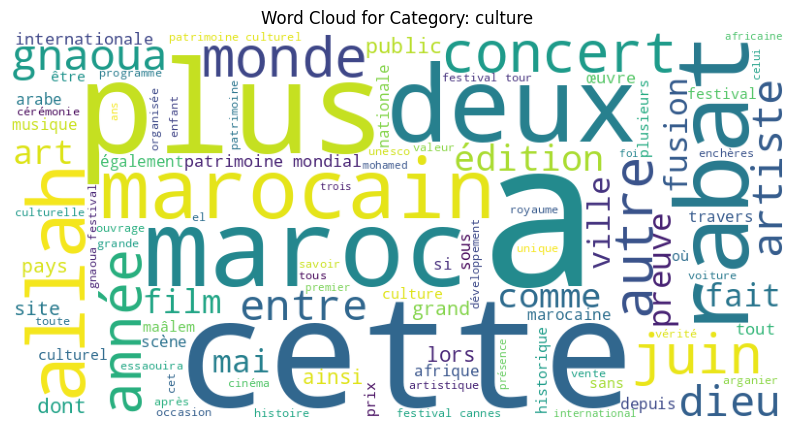

In [61]:

# Word cloud visualization for each category
from wordcloud import WordCloud

# Generating word cloud for each category
categories = labels[0].unique()
for category in categories:
    # Combine text data belonging to the same category
    text = ' '.join([data_cleaned[i] for i in labels[labels[0] == category].index])
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords = stopwords_french, min_font_size = 10).generate(text)
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

<ipython-input-71-3331f5c8cb9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Word Count', data=word_counts_df, palette='Set2')


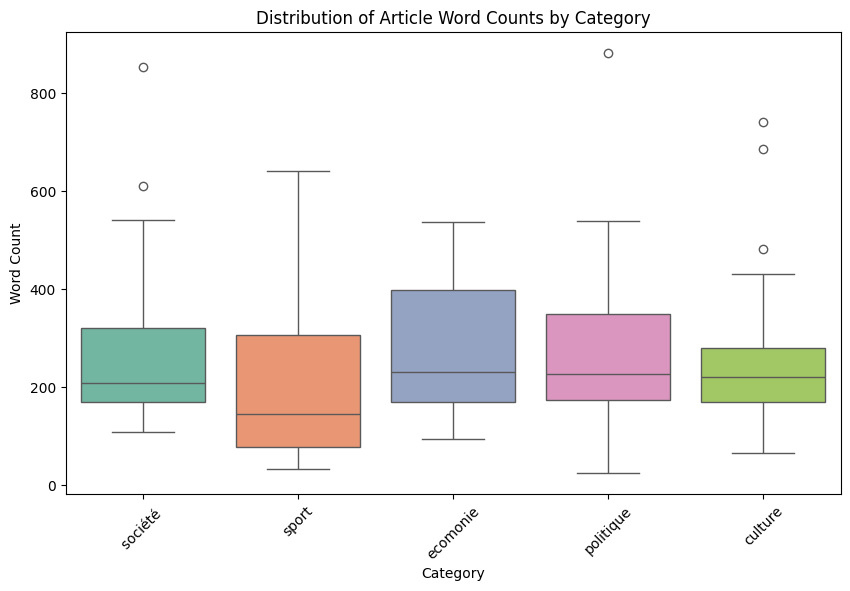

In [71]:
# Box plot of article word counts by category

# Calculate word counts for each article
word_counts_per_article = [len(article.split()) for article in data_cleaned]

# Create a dataframe with article word counts and corresponding categories
word_counts_df = pd.DataFrame({'Category': labels[0], 'Word Count': word_counts_per_article})

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Word Count', data=word_counts_df, palette='Set2')
plt.title('Distribution of Article Word Counts by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


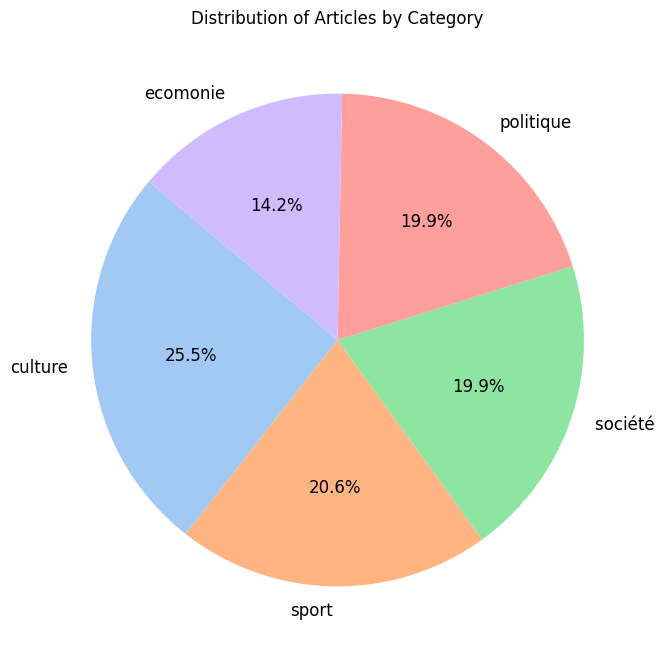

In [72]:
# Pie chart of category distribution

# Count the number of articles in each category
category_counts = labels[0].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops={'fontsize': 12})
plt.title('Distribution of Articles by Category')
plt.show()


# DATA PREPROCESSING


In [69]:
# Cleaning and preprocessing the text data
nltk.download('stopwords')
stopwords_french = stopwords.words('french')

def clean_text(corpus):
    cleaned_corpus = []
    for text in corpus:
        text = text.lower()  # Convert text to lowercase
        text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)  # Remove punctuations
        tokens = text.split()  # Tokenize text into words
        # Remove stopwords and join tokens back into text
        cleaned_text = [token for token in tokens if token not in stopwords_french]
        cleaned_corpus.append(" ".join(cleaned_text))
    return cleaned_corpus

data_cleaned = clean_text(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


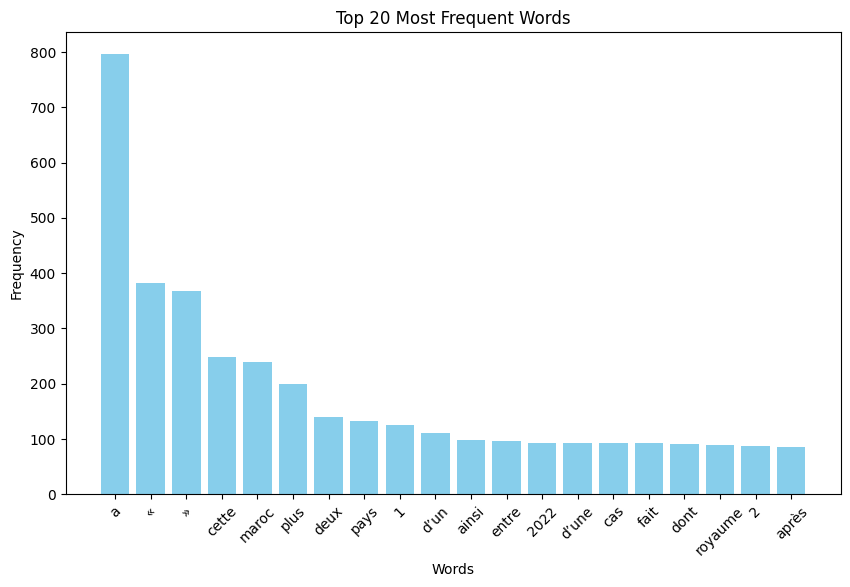

In [70]:
# Bar plot of the top 20 most frequent words in the entire corpus

from collections import Counter

# Combine all cleaned text data into a single string
all_text = ' '.join(data_cleaned)

# Tokenize the combined text
all_tokens = all_text.split()

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Get the top 20 most frequent words
top_words = word_counts.most_common(20)

# Extract words and their counts
top_words, top_counts = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# MODELING


In [78]:
# Creating and fitting MultiLabelBinarizer model
articles_tokens = [article.split() for article in data_cleaned]
mlb = MultiLabelBinarizer()
mlb.fit(articles_tokens)

MultiLabelBinarizer()

In [81]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(articles_tokens, labels[0], test_size=0.3, random_state=None)

# Initializing models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
multinomial_nb_model = MultinomialNB(alpha=1.0, fit_prior=True)
svc_model = SVC()
linear_svc_model = LinearSVC()
decision_tree_model = DecisionTreeClassifier()
gaussian_nb_model = GaussianNB()

# Training and evaluating models
models = [logistic_model, random_forest_model, multinomial_nb_model, svc_model, linear_svc_model, decision_tree_model, gaussian_nb_model]

for model in models:
    model.fit(mlb.transform(x_train), y_train)  # Training the model
    train_accuracy = model.score(mlb.transform(x_train), y_train)  # Evaluating training accuracy
    test_accuracy = model.score(mlb.transform(x_test), y_test)  # Evaluating test accuracy
    print(f"Model: {model.__class__.__name__}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print()


Model: LogisticRegression
Train Accuracy: 1.0
Test Accuracy: 0.7674418604651163

Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.6976744186046512

Model: MultinomialNB
Train Accuracy: 1.0
Test Accuracy: 0.8372093023255814

Model: SVC
Train Accuracy: 0.9897959183673469
Test Accuracy: 0.4883720930232558

Model: LinearSVC
Train Accuracy: 1.0
Test Accuracy: 0.813953488372093

Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.5348837209302325

Model: GaussianNB
Train Accuracy: 1.0
Test Accuracy: 0.8604651162790697



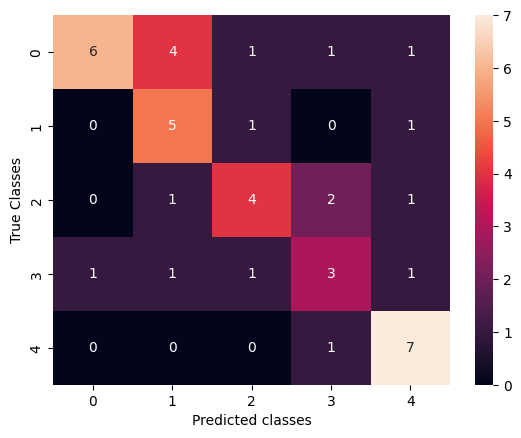

In [82]:
# Confusion matrix for Decision Tree Classifier
decision_tree_model.fit(mlb.transform(x_train), y_train)
y_pred = decision_tree_model.predict(mlb.transform(x_test))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('True Classes')
plt.xlabel('Predicted classes')
plt.show()


In [85]:
# Best Model Prediction
best_model = gaussian_nb_model  # Selecting the best model based on the highest accuracy
new_article = ["Your new article text goes here."]  # Replace with the new article text
predicted_category = best_model.predict(mlb.transform(new_article))
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: culture


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', '.', 'Y', 'c', 'l', 'n', 'o', 's', 't', 'u', 'x'] will be ignored
  warnings.warn(
